## **Data Mining with Python**
### **Semana 4: Clustering ``AgglomerativeClustering()``**
**Andrés C. Medina Sanhueza**

Lead Advanced Analytics Financial Retail Cencosud-Scotiabank

anmedinas@gmail.com

In [2]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import datasets
import scipy.cluster.hierarchy as shc
import warnings 
import pandas as pd 
import numpy as np
import seaborn as sns 

# Omite Warnings 
warnings.simplefilter("ignore")

# Configuracion Entorno Plot
sns.set(rc={'figure.figsize':(5.27,5.27)})

## **``AgglomerativeClustering()``**

``sklearn`` tiene varias deficiencias para este modelo. La más importante, es definir un número de conglomerados y no generar un dendrograma en forma sencilla.

Para este propósito, se utilizará las funciones `linkage`y `dendrogram` de la biblioteca `scipy.cluster.hierarchy`. Mayor referencia en https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

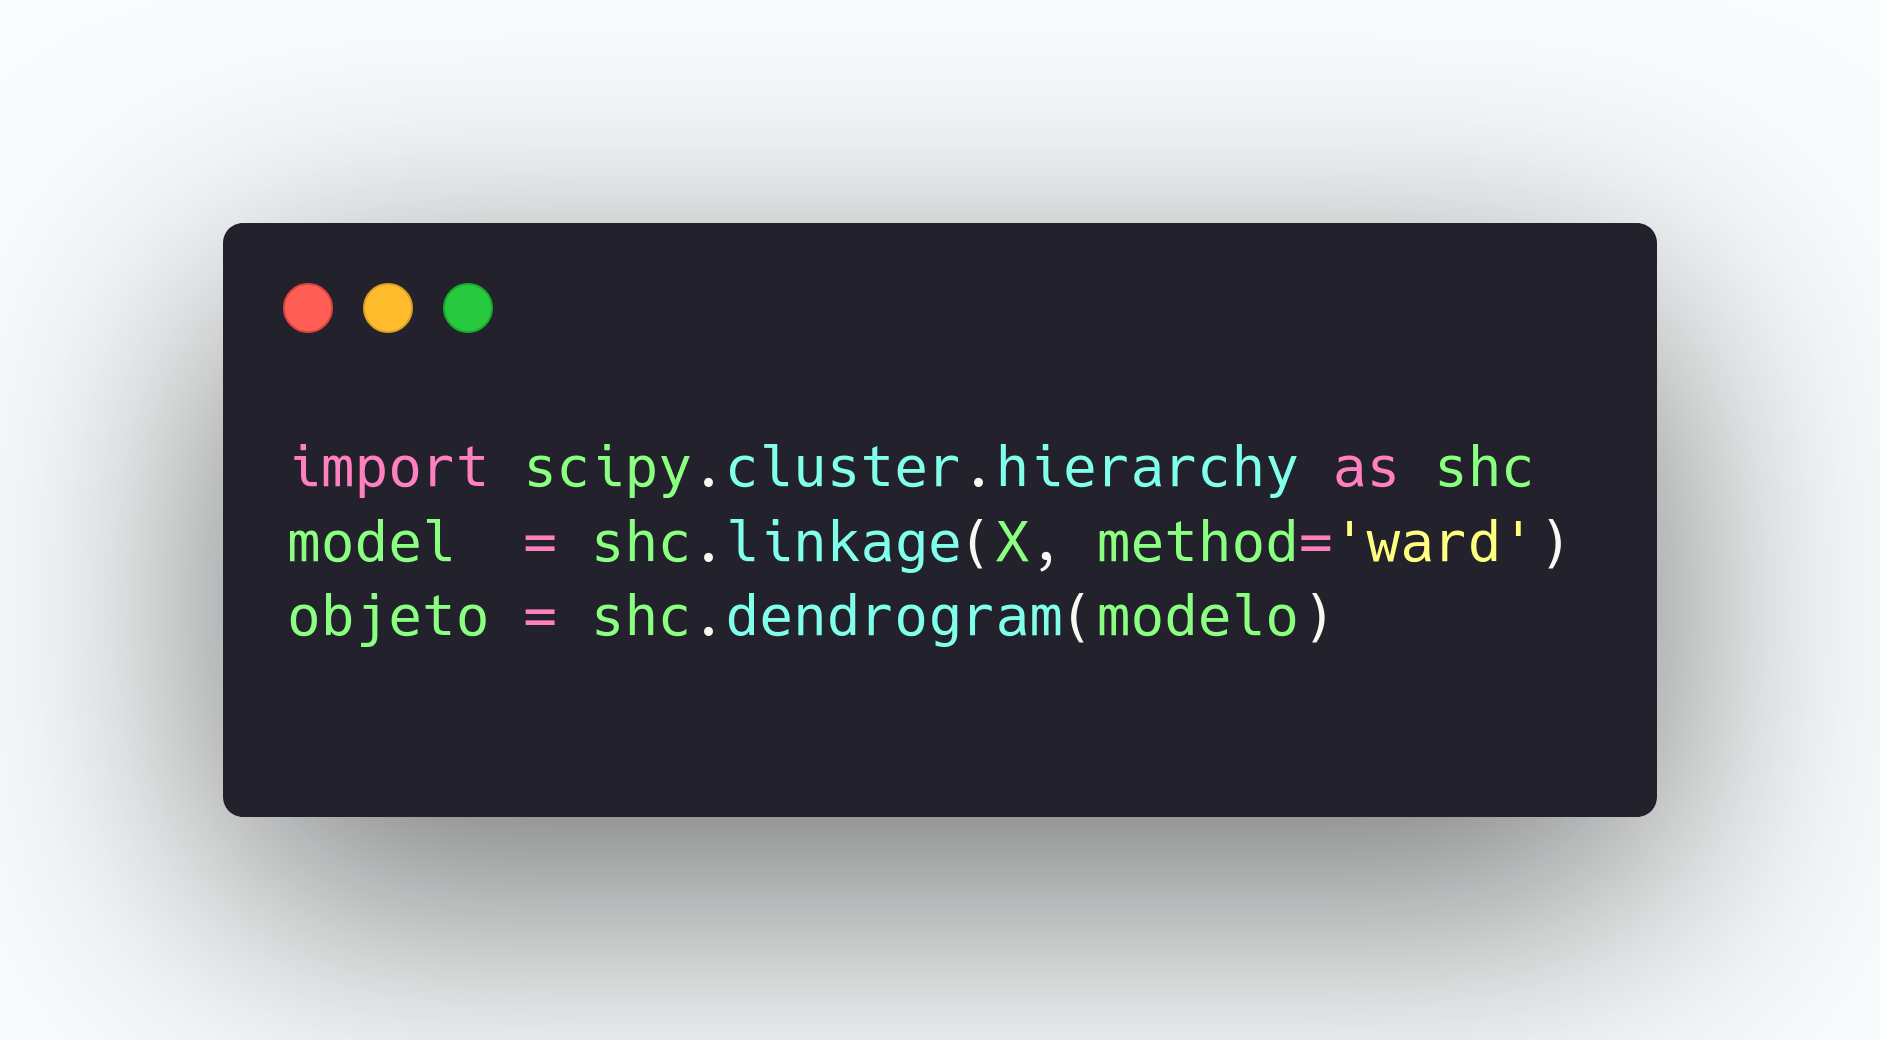

In [5]:
from IPython.display import Image
Image('figs/scipy_cluster.png')

Los parámetros de la función `linkage()` son los siguientes:
* `X` : los datos del modelo
* `method` : Es la distancia que se utilizará como métrica, entre ellas estan `ward`, `complete`, `average`, `single`.

Para gráficar, basta con llamar la función `dendrogram` con el modelo aprendido.

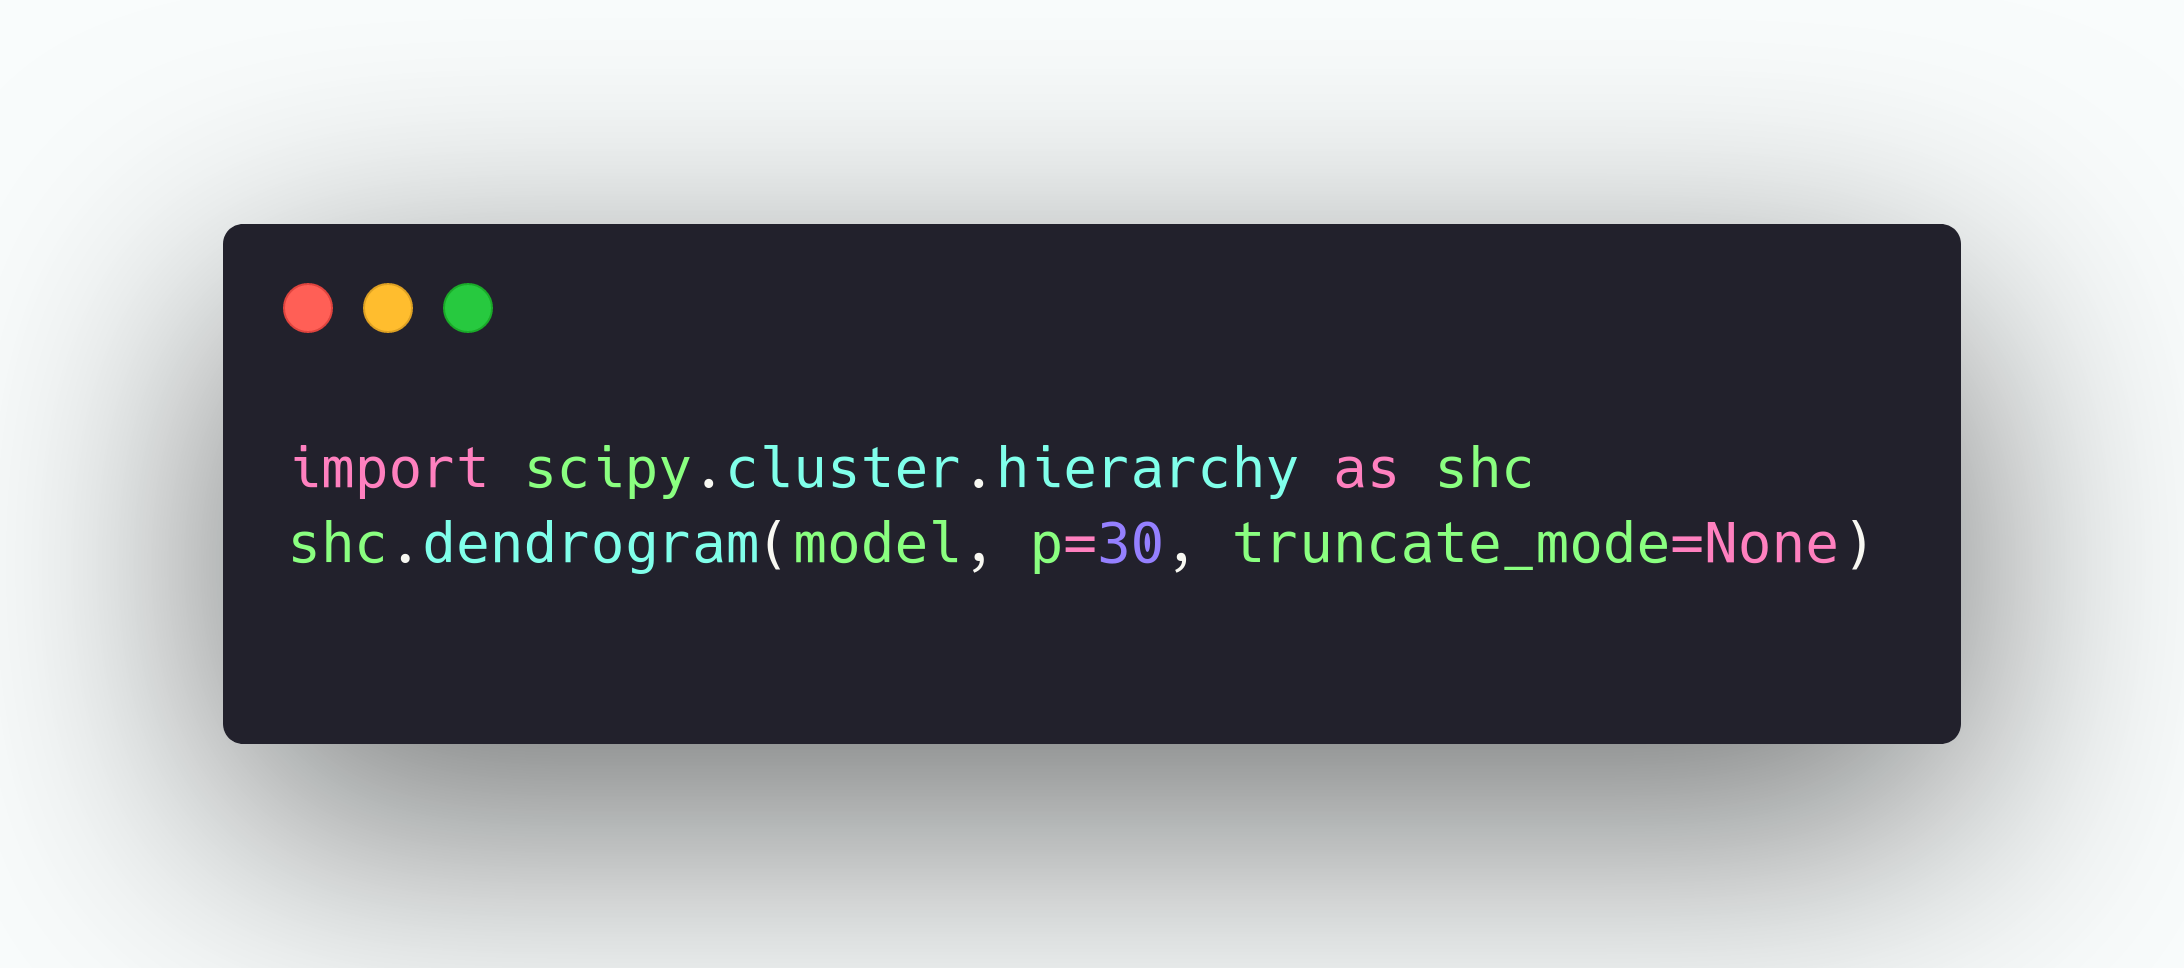

In [6]:
Image("figs/scipy_cluster2.png")

Donde `truncate_mode` puede ser `None` (es decir, muestra todo el dendrograma) o `last` (corta el dendrograma después de `p` ramas).

Para extraer los clusters, se utiliza la función `fcluster(modelo, t, criterion)` donde los parámetros son:

* `modelo`: el modelo generado por la función `linkage`.
* `t`: el valor donde se quiere cortar el dendrograma.
* `criterion = distance`. Existen otros criterios de corte, pero `distance` es el que permite generar los clusters, basados en al altura que definimos.  



In [7]:
# Dataset Wine
wine = datasets.load_wine()

In [8]:
# Escalamiento de los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine.data)

In [9]:
# Entrena el modelo
modelo = shc.linkage(scaled_features, method='ward')

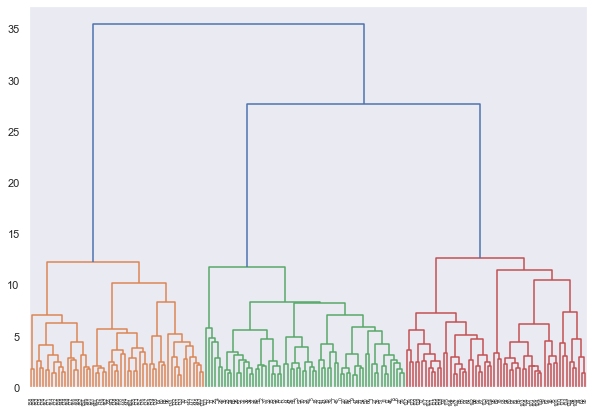

In [10]:
# Generando Dendrograma
sns.set_style('dark')
plt.figure(figsize=(10, 7)) 
objeto = shc.dendrogram(modelo) 

In [11]:
# Extrayendo los cluster sugeridos por el metodo.
clusters = shc.fcluster(modelo,t = 20, criterion="distance")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 3, 3, 3, 2,
       2, 3, 1, 3, 1, 2, 3, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

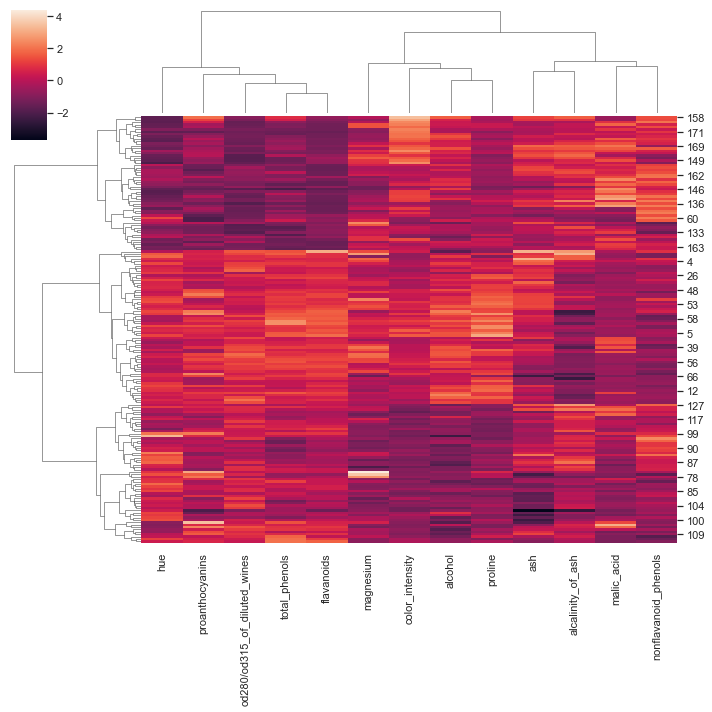

In [12]:
# Dendrograma usando seaborn
df = pd.DataFrame(scaled_features, columns=wine.feature_names)
sns.clustermap(df, method="ward", col_cluster = True)
plt.show()

In [13]:
# Creando el objeto y aplicando PCA 
pca = PCA(n_components = 2)
pca.fit(scaled_features)
tmpData = pca.transform(scaled_features)
tmpData = pd.DataFrame(tmpData,columns=["PC1","PC2"])
tmpData["labels"] = clusters

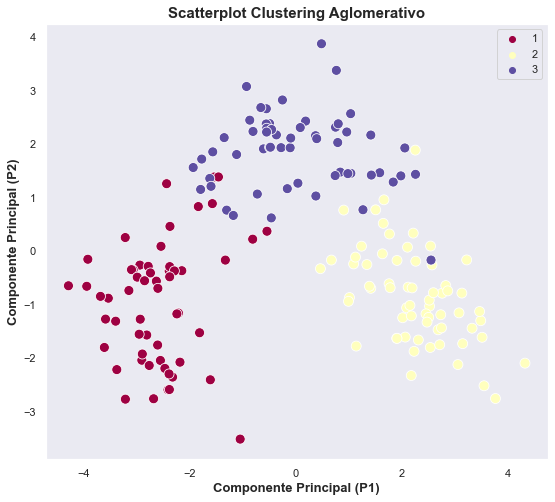

In [14]:
plt.figure(figsize=(9,8))
ax = sns.scatterplot(data = tmpData, x="PC1", y="PC2", hue="labels", palette="Spectral", s=100)
ax.set_xlabel("Componente Principal (P1)", fontsize=13,fontweight='bold')
ax.set_ylabel("Componente Principal (P2)", fontsize=13,fontweight='bold')
ax.set_title("Scatterplot Clustering Aglomerativo", fontsize=15,fontweight='bold')
ax.legend() 
plt.show()

## **Clustering con variables categoricas**

In [15]:
# Cargando y viendo los datos
bank = pd.read_csv('bank.csv',sep=";")

In [16]:
# Extrayendo las variables categoricas
bank_cust = bank[['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','poutcome']]

In [17]:
# Agregando edad como variable categorica
bank_cust['edad'] = pd.cut(bank['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])


In [18]:
# Copia de los datos de origen
bank_cust_orig = bank_cust.copy() 

In [19]:
le = preprocessing.LabelEncoder()
muestraDatosOrig = bank_cust.apply(le.fit_transform)
muestraDatos = muestraDatosOrig.sample(1000)
muestraDatos.head(10)

,job,marital,education,default,housing,loan,contact,month,poutcome,edad
681,9,1,1,0,0,1,0,1,3,2
2238,6,1,2,0,1,0,0,3,3,1
1999,1,1,1,0,1,1,0,8,3,2
2959,7,2,1,0,1,0,0,8,3,3
851,1,1,1,0,0,0,0,1,3,3
2363,4,0,2,0,0,1,0,6,3,4
522,0,0,1,0,1,0,0,9,0,3
2542,0,2,1,0,1,0,0,9,3,1
1047,1,1,1,0,1,0,0,0,3,1
604,1,1,0,0,1,0,0,5,3,3


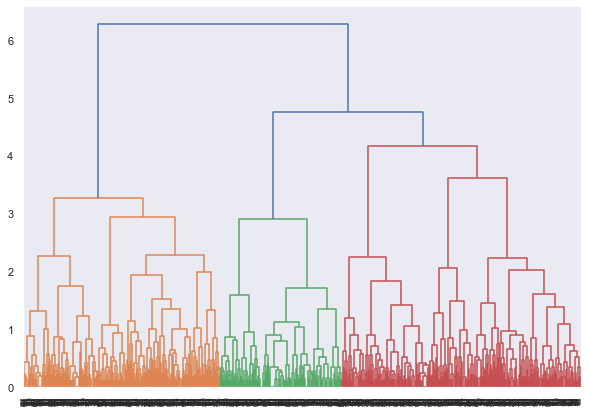

In [20]:
from scipy.spatial.distance import pdist
distCategorica = pdist(muestraDatos, 'hamming')

# Entrenando el modelo
modelo = shc.linkage(distCategorica, method='ward')
plt.figure(figsize=(10, 7))     # Seteando el tamaño de la figura
objeto = shc.dendrogram(modelo) # Generando el dendrograma